In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

In [36]:
#load dataset + drop null
df = pd.read_csv('response indo.csv')
df = df.dropna()

newDf = df[["Music","Slow songs or fast songs","Dance","Folk","Country","Classical music","Musical","Pop","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz","Rock n roll","Alternative","Latino","Techno, Trance","Opera","Smoking"]]
# newDf = df[["Smoking","Alcohol","Healthy eating","Slow songs or fast songs"]]

In [37]:
#check null value
newDf.isna().values.any()

False

In [38]:
#replace d kolom smoking never smoke dan tried dgn 0 dan former dan current dengan 1
newDf[['Smoking']] = newDf[['Smoking']].replace({'never smoked': 0, 'tried smoking': 0, 'former smoker': 1, 'current smoker': 1})
# newDf[['Alcohol']] = newDf[['Alcohol']].replace({'never': 0, 'social drinker': 1, 'drink a lot': 2})

C:\Users\Albert\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [39]:
#check null value
newDf.isna().values.any()

False

In [40]:
#check value smoking
newDf[['Smoking']].values

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [41]:
#correlation 
newDf.corr(method='pearson')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Smoking
Music,1.000000,0.176978,0.453040,0.210119,0.192828,0.372210,0.347826,0.468897,0.201698,0.070504,0.106600,0.286097,0.205512,0.226278,0.203401,0.321668,0.168948,0.189994,0.259832,-0.021493
Slow songs or fast songs,0.176978,1.000000,0.105764,-0.102791,-0.106137,-0.092466,-0.188917,0.101261,0.251338,0.221261,0.238407,0.190566,-0.046807,0.102595,0.327257,0.146063,0.008920,0.160093,0.041460,0.069195
Dance,0.453040,0.105764,1.000000,0.186329,0.263382,0.228867,0.245285,0.230209,0.315338,0.147960,0.179206,0.472527,0.336176,0.281275,0.502438,0.475901,0.219096,0.383474,0.219037,0.064068
Folk,0.210119,-0.102791,0.186329,1.000000,0.339742,0.339495,0.312126,-0.201361,0.200282,0.088820,-0.023965,-0.117074,0.354690,0.224735,0.140169,0.028998,0.320982,-0.112052,0.446515,0.083691
Country,0.192828,-0.106137,0.263382,0.339742,1.000000,0.168932,0.207411,0.184169,0.086347,0.013684,0.181985,-0.059403,0.366806,0.170250,0.188820,0.397659,0.323685,0.031884,0.066036,0.010295
Classical music,0.372210,-0.092466,0.228867,0.339495,0.168932,1.000000,0.577476,0.073471,0.165358,0.078560,0.076206,-0.125732,0.190342,0.239167,0.112328,0.165434,0.119453,0.108892,0.358851,0.141182
Musical,0.347826,-0.188917,0.245285,0.312126,0.207411,0.577476,1.000000,0.182136,-0.027712,-0.015944,0.042857,0.018964,0.246248,0.420579,0.050161,0.230581,0.303990,-0.014218,0.439149,0.058529
Pop,0.468897,0.101261,0.230209,-0.201361,0.184169,0.073471,0.182136,1.000000,0.008883,-0.152449,0.049763,0.418684,0.056710,0.078375,-0.012618,0.322046,0.002804,0.314571,0.069713,0.008435
Rock,0.201698,0.251338,0.315338,0.200282,0.086347,0.165358,-0.027712,0.008883,1.000000,0.753082,0.568183,0.180396,0.293368,0.077411,0.788790,0.300648,0.152997,0.172658,-0.064958,0.247169
Metal or Hardrock,0.070504,0.221261,0.147960,0.088820,0.013684,0.078560,-0.015944,-0.152449,0.753082,1.000000,0.747442,0.106044,0.306729,0.097521,0.629123,0.245254,0.196827,0.200001,0.086146,0.211339


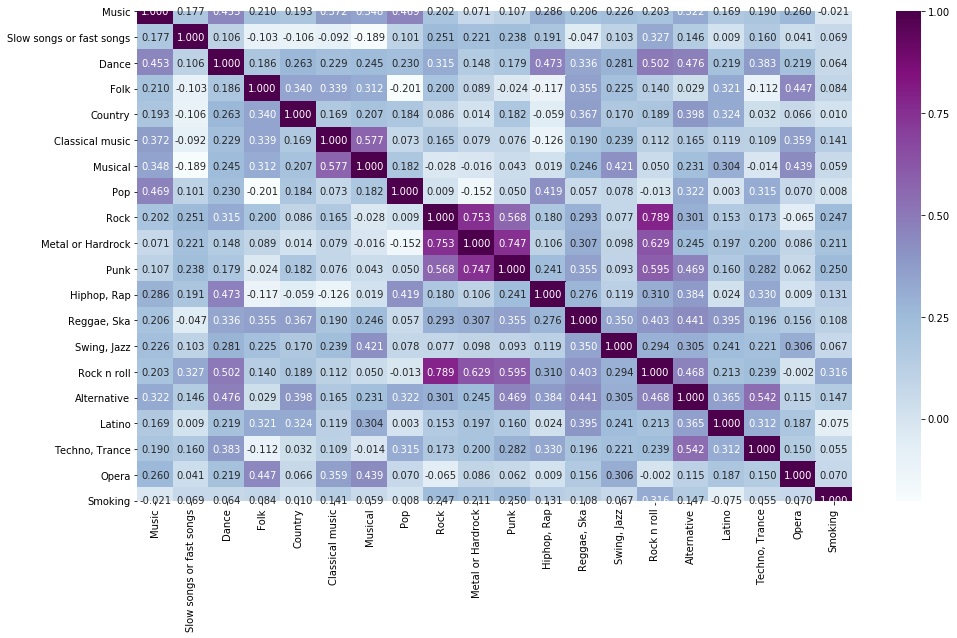

In [42]:
#correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(newDf.corr(method='pearson'), annot=True, fmt='.3f', cmap='BuPu')

   Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0      3                         3      1     1        1                1   
1      5                         3      5     4        4                4   
2      5                         2      1     2        1                5   
3      5                         2      3     3        4                4   
4      5                         3      4     4        3                3   

   Musical  Pop  Rock  Metal or Hardrock  Punk  Hiphop, Rap  Reggae, Ska  \
0        4    5     1                  1     1            4            1   
1        5    4     5                  5     4            5            4   
2        5    4     1                  1     1            1            1   
3        4    4     2                  2     2            3            2   
4        3    4     3                  3     3            4            3   

   Swing, Jazz  Rock n roll  Alternative  Latino  Techno, Trance  Opera  \
0    

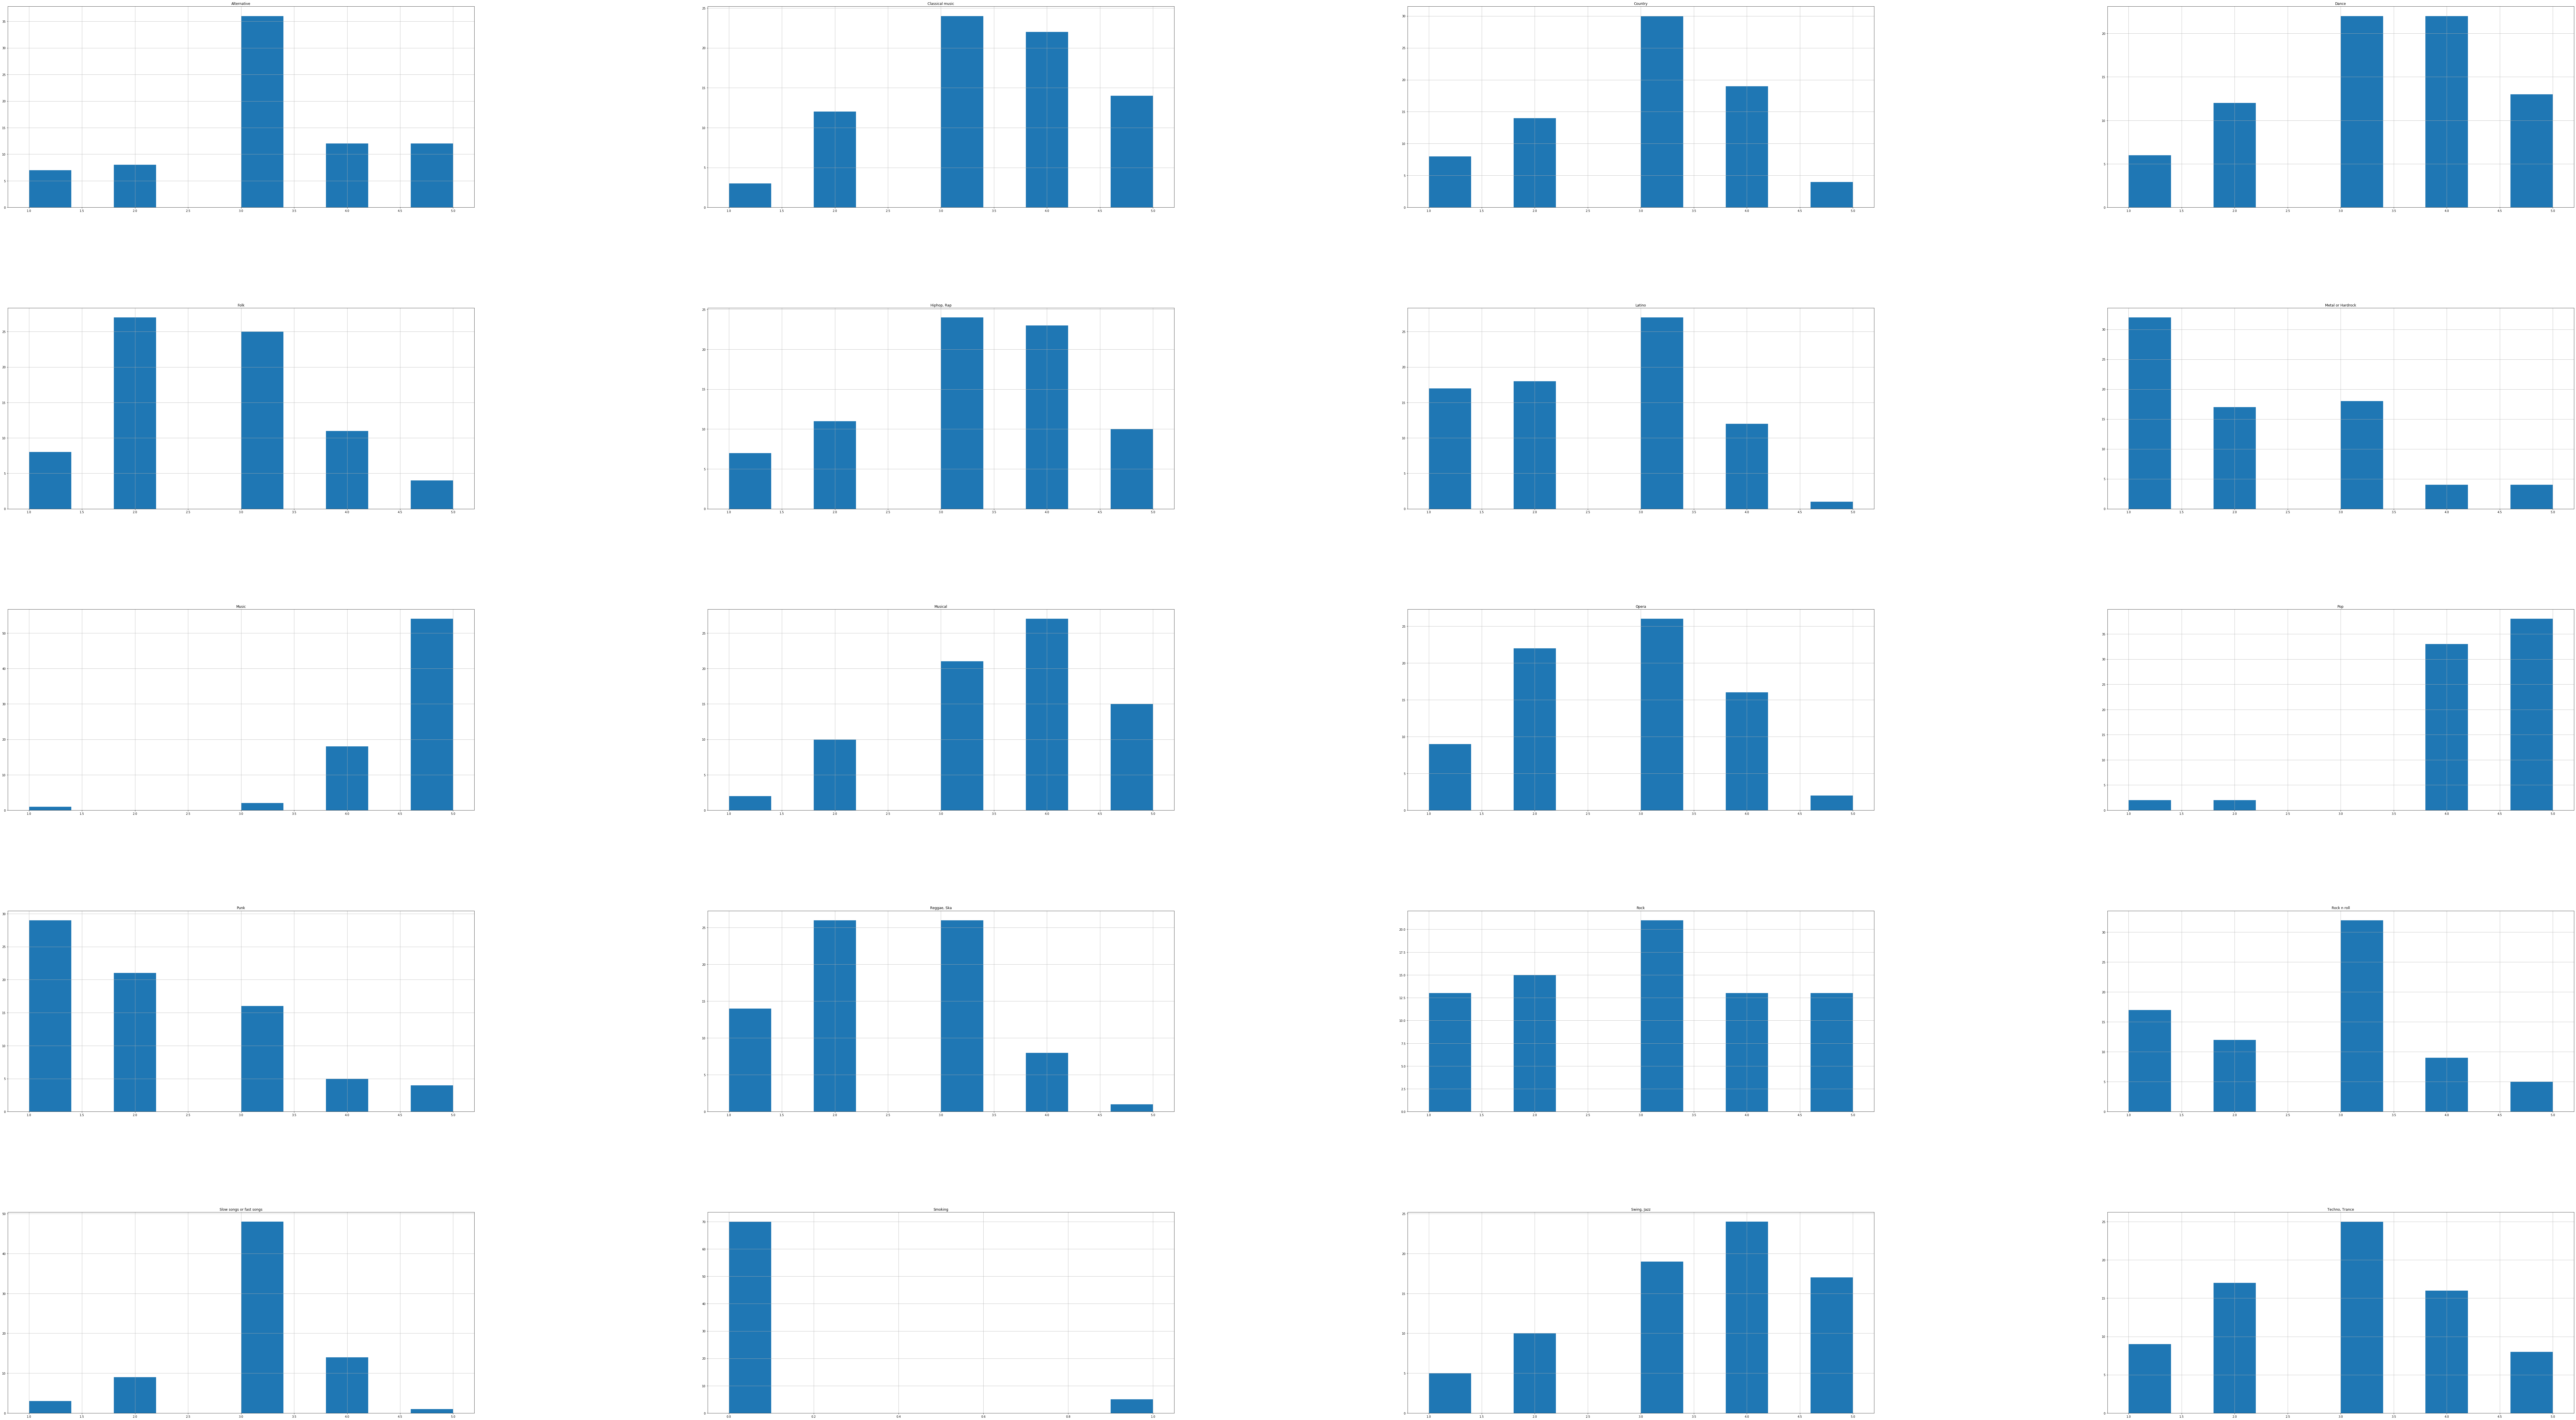

In [43]:
#histogram 
featPred = newDf[["Music","Slow songs or fast songs","Dance","Folk","Country","Classical music","Musical","Pop","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz","Rock n roll","Alternative","Latino","Techno, Trance","Opera","Smoking"]]
print(featPred.head())

featPred.hist()
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.rcParams["figure.figsize"] = [160,90]
plt.show()

In [44]:
# ### No. 4 (Learning Model)

# train, test = train_test_split(newDf, test_size=0.2)
# regLin = linear_model.LinearRegression()
# regLin.fit(train[["Music","Slow songs or fast songs","Dance","Folk","Country","Classical music","Musical","Pop","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz","Rock n roll","Alternative","Latino","Techno, Trance","Opera"]], train[['Smoking']])

# print('Length of Training Set: ', len(train))
# print('Length of Test Set: ', len(test))
# print()


# print('Coefficients: ', regLin.coef_)
# print('Intercept: ',regLin.intercept_)

In [45]:
# ### No. 5 (Evaluasi)

# prediction = regLin.predict(test[["Music","Slow songs or fast songs","Dance","Folk","Country","Classical music","Musical","Pop","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz","Rock n roll","Alternative","Latino","Techno, Trance","Opera"]])

# print("Mean Absolute Error (MAE): ", mean_absolute_error(test[["Smoking"]], prediction))
# print("Mean Squared Error (MSE): ", mean_squared_error(test[["Smoking"]], prediction))
# print("R2: ", r2_score(test[["Smoking"]], prediction))

In [46]:
X = newDf[["Music","Slow songs or fast songs","Dance","Folk","Country","Classical music","Musical","Pop","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz","Rock n roll","Alternative","Latino","Techno, Trance","Opera"]].values
y = newDf[["Smoking"]].values

In [47]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# x = music
# y = health[['Smoking']]

# def knn_comparison(k):    
#     clf = neighbors.KNeighborsClassifier(n_neighbors=k)
#     clf.fit(x, y)# Plotting decision region
#     plot_decision_regions(x, y, clf=clf, legend=2)# Adding axes annotations
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('Knn with K=' + str(k))
#     plt.show()

In [48]:
#applying decision tree
classifier = DecisionTreeClassifier (random_state = 0,max_depth=3, min_samples_leaf=5)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [49]:
#print confusion matrix
df_table = confusion_matrix(y_test, y_pred)
df_table


# newClassification = KNN.predict([[1,5],[3]])
# print(newClassification)

# for i in [1,5,20,30,40,60]:
#     knn_comparison(i)

array([[14,  0],
       [ 1,  0]], dtype=int64)

In [50]:
#find accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 93.33 %.


In [51]:
#find preciison recall and f1 score
precision = df_table[0,0] / (df_table[0,0] + df_table[0,1])
recall = df_table[0,0] / (df_table[0,0] + df_table[1,0])
print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] +df_table[1,0]+df_table[1,1]))
print ('precision:', precision )
print('recall:', recall)
print('f1 score: ', (2*precision*recall)/(precision+recall))

accuracy: 0.9333333333333333
precision: 1.0
recall: 0.9333333333333333
f1 score:  0.9655172413793104
